In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:

df = pd.read_csv(
    "spam_ham_dataset.csv",
    encoding='latin1'
)

df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df=df[["text","label_num"]]

<Axes: xlabel='label_num', ylabel='count'>

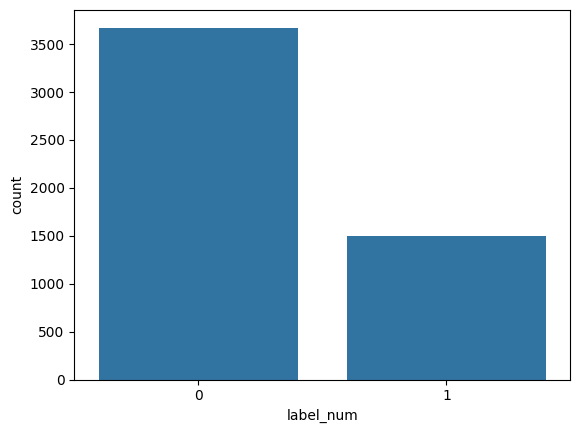

In [ ]:
sns.barplot(x=df.label_num.value_counts().index,y=df.label_num.value_counts())

In [ ]:
x = df['text']
y = df['label_num']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.3,
    random_state=1
)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('model', MultinomialNB())
])

pipe.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('model', MultinomialNB())])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = pipe.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham (0)', 'Spam (1)']))

Accuracy: 0.9820

Confusion Matrix:
[[1090   11]
 [  17  434]]


Classification Report:
              precision    recall  f1-score   support

     Ham (0)       0.98      0.99      0.99      1101
    Spam (1)       0.98      0.96      0.97       451

    accuracy                           0.98      1552
   macro avg       0.98      0.98      0.98      1552
weighted avg       0.98      0.98      0.98      1552



In [ ]:
# Test with some new examples
new_messages = [
    "Congratulations! You've won a $1,000 gift card. Click here to claim.",
    "Hey, are you free for dinner tonight?",
    "URGENT: Your account has been suspended. Please verify your details."
]

predictions = pipe.predict(new_messages)
predictions_proba = pipe.predict_proba(new_messages)

for msg, pred, proba in zip(new_messages, predictions, predictions_proba):
    label = 'Spam' if pred == 1 else 'Ham'
    print(f"Message: '{msg}'")
    print(f"Prediction: {label} (Ham Prob: {proba[0]:.3f}, Spam Prob: {proba[1]:.3f})\n")

Message: 'Congratulations! You've won a $1,000 gift card. Click here to claim.'
Prediction: Spam (Ham Prob: 0.004, Spam Prob: 0.996)

Message: 'Hey, are you free for dinner tonight?'
Prediction: Ham (Ham Prob: 0.811, Spam Prob: 0.189)

Message: 'URGENT: Your account has been suspended. Please verify your details.'
Prediction: Ham (Ham Prob: 0.840, Spam Prob: 0.160)

